In [44]:
import os
import numpy as np
import pandas as pd

os.chdir('../core')

In [45]:
DATA_DIR = "../data"
FILE_NAME = "data.csv"

df = pd.read_csv(os.path.join(DATA_DIR, FILE_NAME))
df = df.drop(columns=["Cus.ID"])
df = df.drop(columns=["Date"])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

target_column = "Does he/she Come from Facebook Page?"
df[target_column] = df[target_column].map({"Yes": 1, "No": 0})
print(df.shape)

df

(8871, 9)


,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,Rangamati Sadar,49,M,iQOO Neo 9 Pro 5G 12/256,23271.0,0,Yes,No,Yes
1,Inside Rangamati,22,F,Redmi Note 12 Pro 8/128,21682.0,1,Yes,Yes,No
2,Outside Rangamati,48,M,Narzo N53 4/64,13161.0,0,No,No,Yes
3,Outside Rangamati,38,M,Redmi Note 12 Pro 8/128,26133.0,0,No,No,Yes
4,Rangamati Sadar,34,F,iPhone 16 Pro 256GB,26221.0,0,No,No,Yes
...,...,...,...,...,...,...,...,...,...
8866,Outside Rangamati,35,F,Galaxy M35 5G 8/128,25311.0,0,Yes,No,Yes
8867,Rangamati Sadar,27,F,Pixel 7a 8/128,13065.0,0,Yes,No,Yes
8868,Outside Rangamati,49,F,Vivo T3x 5G 8/128,14166.0,0,No,Yes,Yes
8869,Rangamati Sadar,21,M,Pixel 7a 8/128,21195.0,0,No,No,Yes


In [46]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Chọn cột
numeric_columns = df.drop(columns=[target_column]).select_dtypes(include=['int64', 'float64']).columns.tolist()
category_columns = df.select_dtypes(include=['object']).columns.tolist()

# Pipeline cho categorical: encode -> scale
cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder()),   # hoặc OneHotEncoder nếu bạn muốn one-hot
    ('scaler', StandardScaler())
])

# Pipeline cho numeric: scale
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Ghép lại
processor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_columns),
        ('cat', cat_pipeline, category_columns)
    ]
)

# Fit transform
X = processor.fit_transform(df.drop(columns=[target_column]), df[target_column])
y = df[target_column].values.reshape(-1, 1)

X


array([[ 1.558891  , -0.09967878,  1.21916882, ...,  1.22227476,
        -0.5732283 ,  0.81239923],
       [-1.25593392, -0.18780095, -1.23940054, ...,  1.22227476,
         1.74450563, -1.23092189],
       [ 1.45463822, -0.66035535, -0.01011586, ..., -0.81814665,
        -0.5732283 ,  0.81239923],
       ...,
       [ 1.558891  , -0.60462044, -0.01011586, ..., -0.81814665,
         1.74450563,  0.81239923],
       [-1.36018669, -0.21480881,  1.21916882, ..., -0.81814665,
        -0.5732283 ,  0.81239923],
       [-0.73467004,  0.77233687,  1.21916882, ..., -0.81814665,
         1.74450563, -1.23092189]], shape=(8871, 8))

## Gradient Descent

In [47]:
folder = "gradient_descent"
folder_path = f"../images/{folder}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Parameters for plot
fontsize = 17
offset = 4

In [48]:
import matplotlib.pyplot as plt
from base import LogisticRegressionGD

learning_rates = [0.005, 0.01, 0.02, 0.05, 0.1]
num_iterations = 5000   
regularization = "None"

loss_loggers = {}
time_loggers = {}
gradient_loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegressionGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[learning_rate] = lr.history
    time_loggers[learning_rate] = lr.times
    gradient_loggers[learning_rate] = lr.gradients

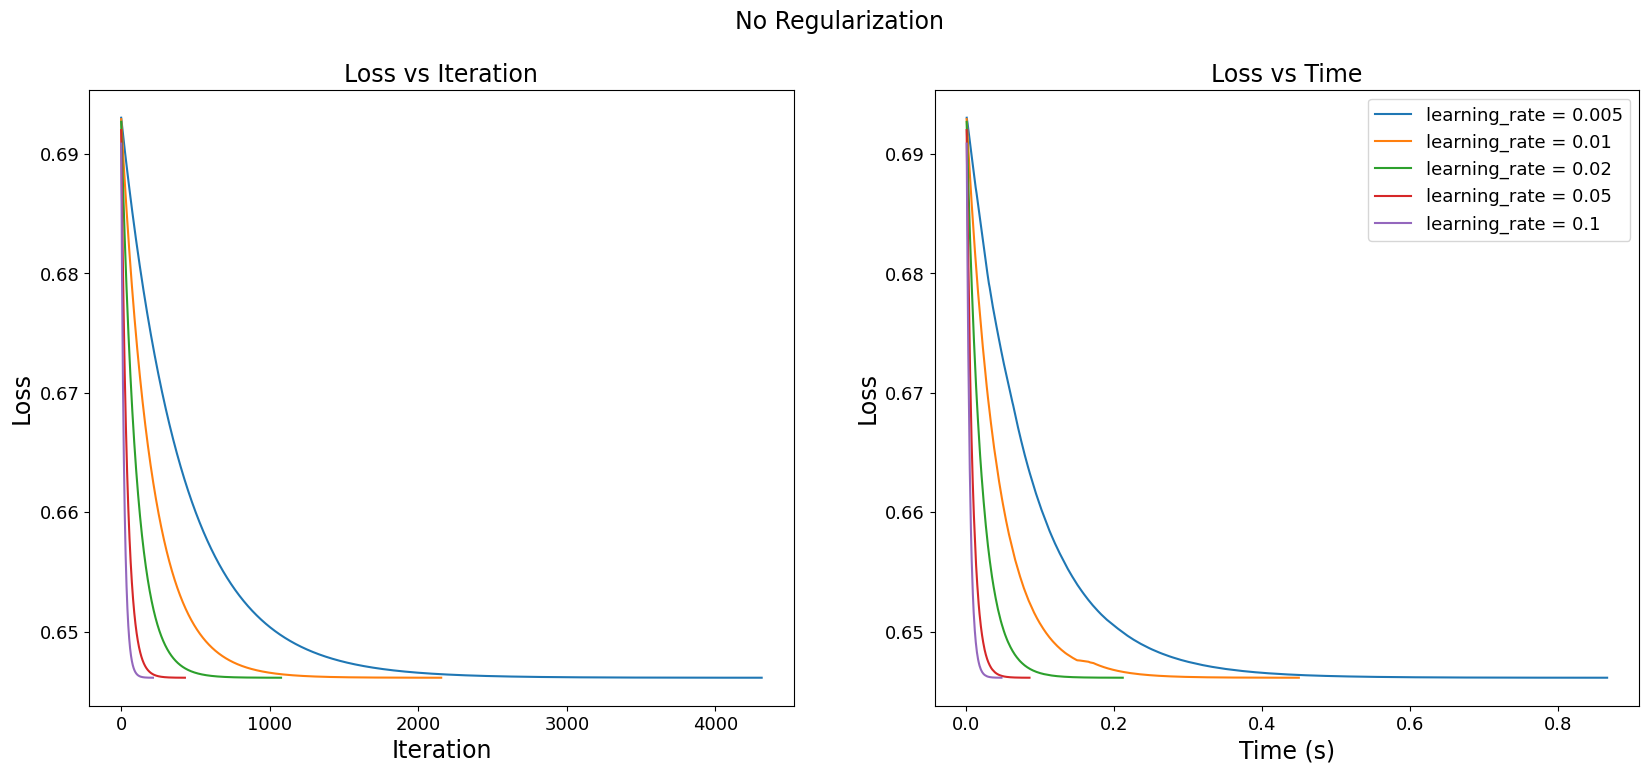

In [49]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("No Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[0].plot(loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Time", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[1].plot(time_loggers[learning_rate], loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[1].set_xlabel("Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/loss_no_regularization.png"
plt.savefig(file_path, format='png')

plt.show()

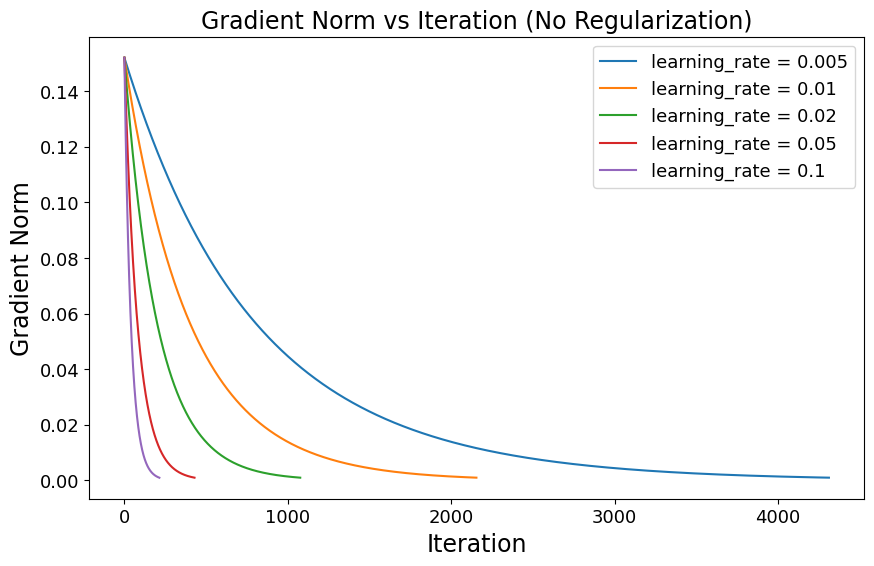

In [50]:
# Plot loss and change font size of labels, ticks, title and legend
plt.figure(figsize=(10, 6))

for learning_rate in learning_rates:
    plt.plot(gradient_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

plt.xlabel("Iteration", fontsize=fontsize)
plt.ylabel("Gradient Norm", fontsize=fontsize)
plt.title("Gradient Norm vs Iteration (No Regularization)", fontsize=fontsize)
plt.xticks(fontsize=fontsize - offset)
plt.yticks(fontsize=fontsize - offset)
plt.legend(fontsize=fontsize - offset)

# Save image
plt.savefig("../images/gradient_descent_no_regularization.png", format='png')

plt.show()

## Large Learning Rate

In [51]:
import matplotlib.pyplot as plt
from base import LogisticRegressionGD

learning_rates = [1.0, 5.0, 10.0]
num_iterations = 1000
regularization = "None"

loss_loggers = {}
time_loggers = {}
gradient_loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegressionGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[learning_rate] = lr.history
    time_loggers[learning_rate] = lr.times
    gradient_loggers[learning_rate] = lr.gradients

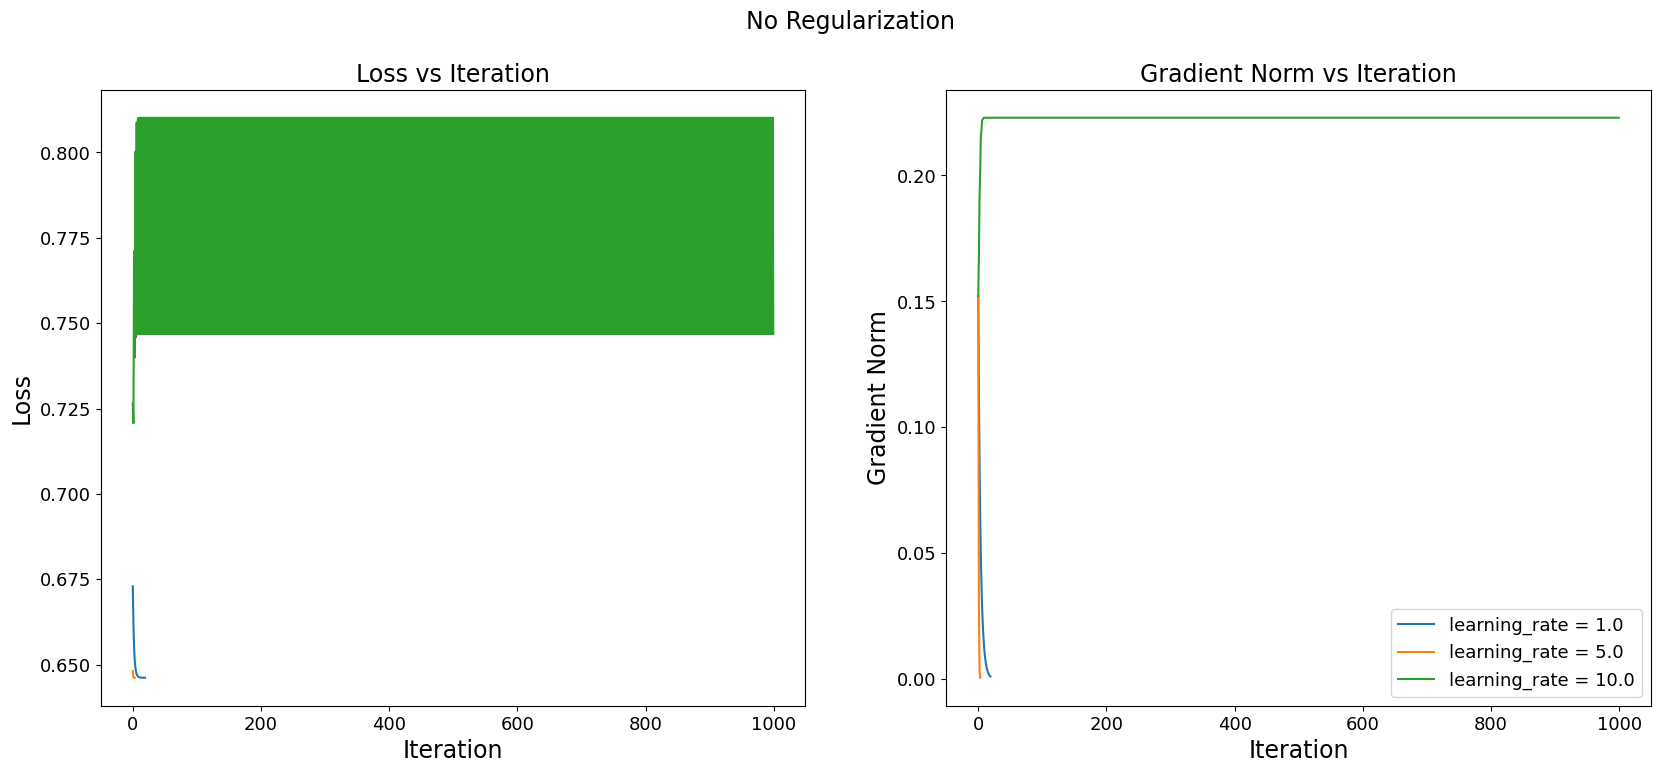

In [52]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("No Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[0].plot(loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot gradient norm vs time
axs[1].set_title("Gradient Norm vs Iteration", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[1].plot(gradient_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[1].set_xlabel("Iteration", fontsize=fontsize)
axs[1].set_ylabel("Gradient Norm", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/loss_vs_gradient_norm_no_regularization.png"
plt.savefig(file_path, format='png')

plt.show()

# L1 Regularization

In [66]:
import matplotlib.pyplot as plt
from base import LogisticRegressionGD

lambda_values = [0, 10, 100, 1000, 5000]
learning_rate = 0.1
num_iterations = 500
regularization = "l1"

loss_loggers = {}
time_loggers = {}

for lambda_value in lambda_values:
    lr = LogisticRegressionGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        lambda_=lambda_value,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[lambda_value] = lr.history
    time_loggers[lambda_value] = lr.times

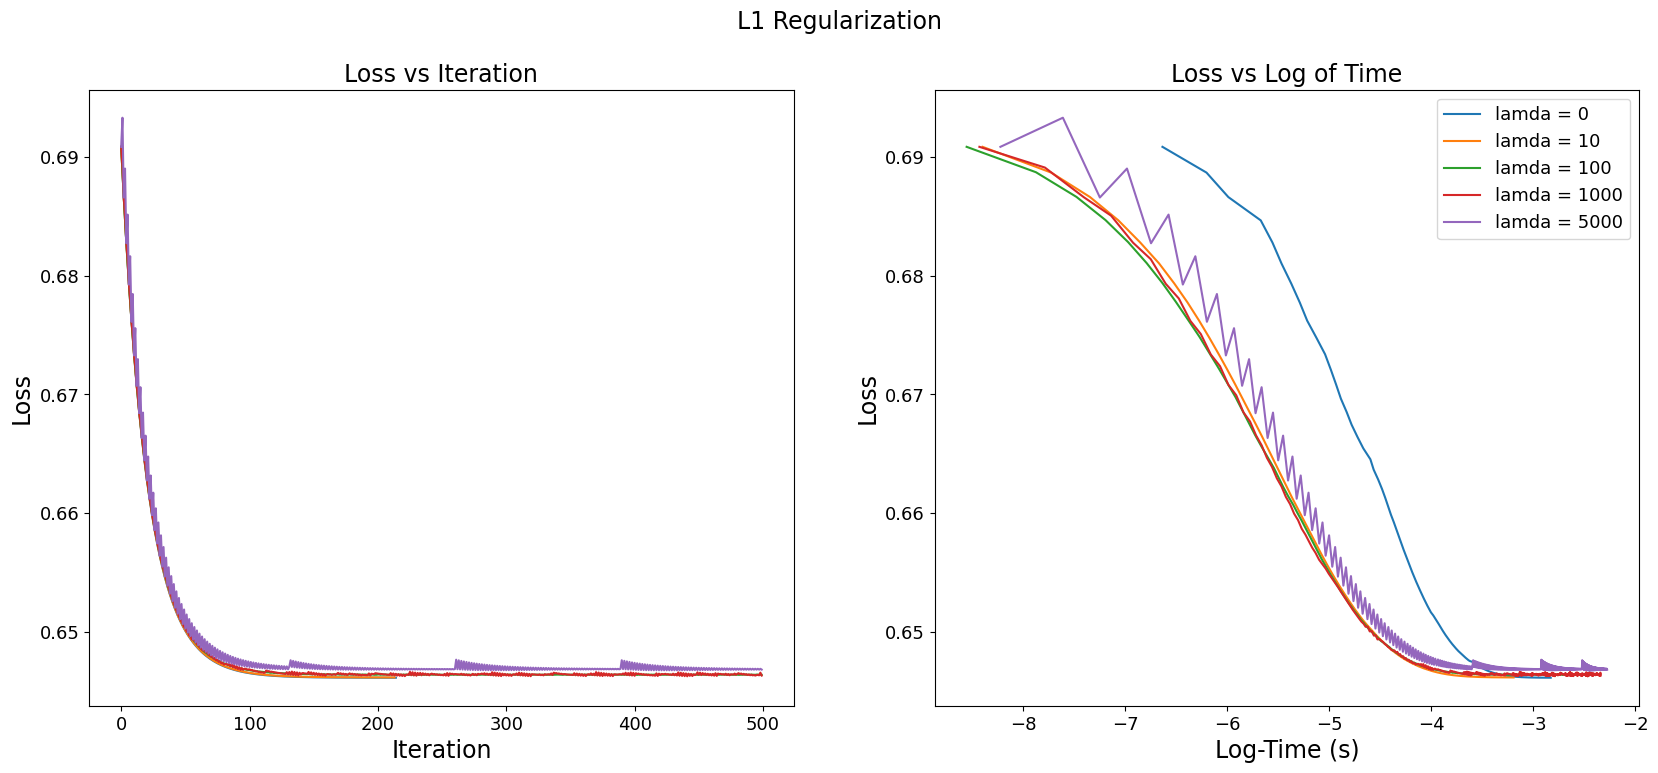

In [67]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("L1 Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[0].plot(loss_loggers[lambda_value], label=f"lamda = {lambda_value}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[1].plot(np.log(time_loggers[lambda_value]), loss_loggers[lambda_value], label=f"lamda = {lambda_value}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/loss_l1_regularization.png"
plt.savefig(file_path, format='png')

plt.show()

In [55]:
import matplotlib.pyplot as plt
from base import LogisticRegressionGD

lambda_value = 10
learning_rates = [0.2, 0.3, 0.4, 0.5, 0.6]
num_iterations = 1000
regularization = "l1"

loss_loggers = {}
time_loggers = {}

for learning_rate in learning_rates:
    lr = LogisticRegressionGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        lambda_=lambda_value,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[learning_rate] = lr.history
    time_loggers[learning_rate] = lr.times

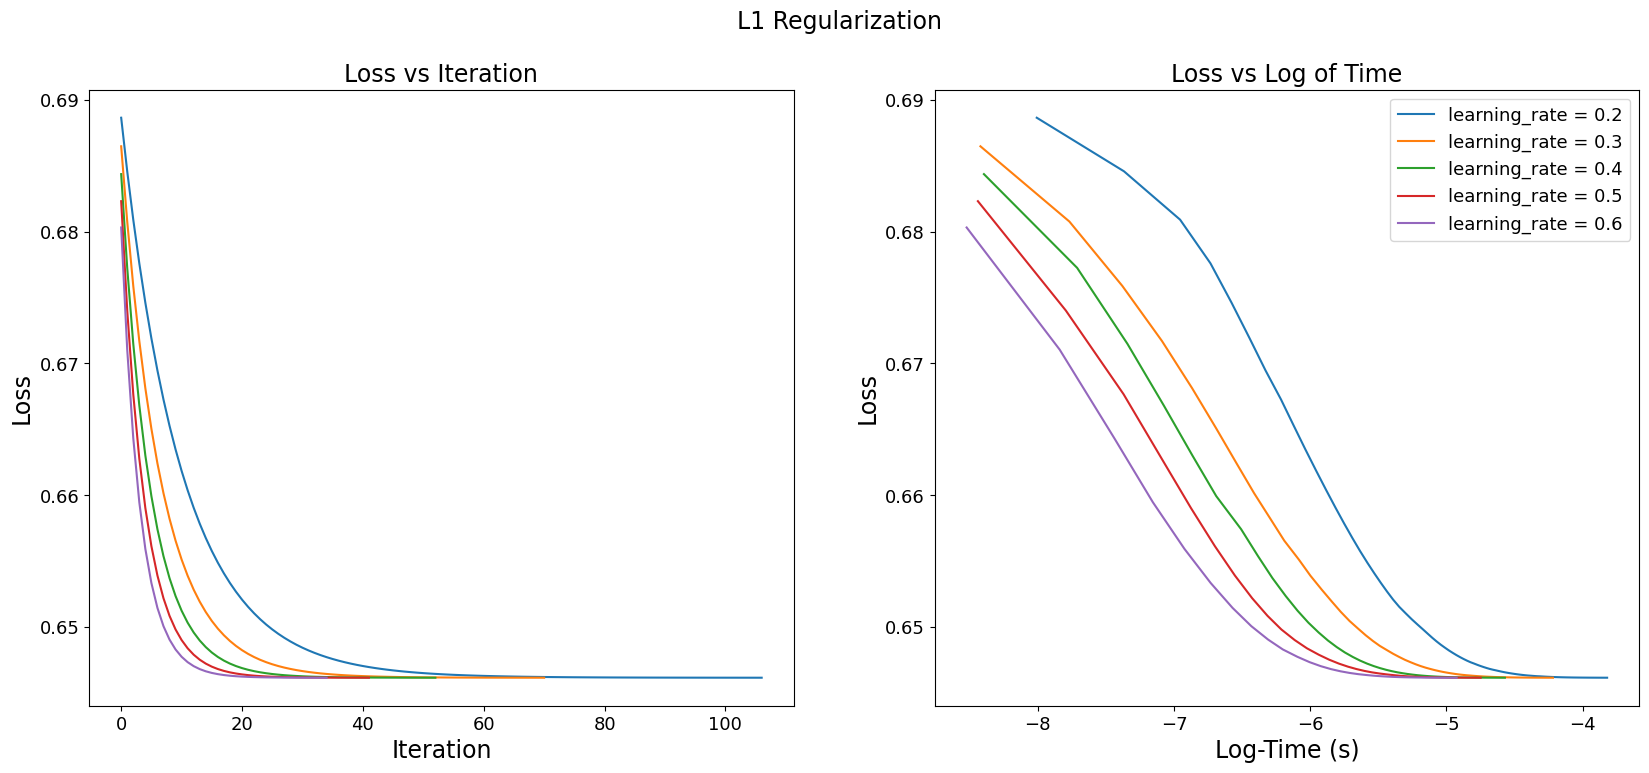

In [56]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("L1 Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[0].plot(loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[1].plot(np.log(time_loggers[learning_rate]), loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/loss_l1_regularization_fix_lamda.png"
plt.savefig(file_path, format='png')

plt.show()

## L2 Regularization

In [57]:
import matplotlib.pyplot as plt
from base import LogisticRegressionGD

lambda_values = [0, 10, 100, 500, 1000, 5000]
learning_rate = 0.1
num_iterations = 1000
regularization = "l2"

loss_loggers = {}
time_loggers = {}

for lambda_value in lambda_values:
    lr = LogisticRegressionGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        lambda_=lambda_value,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[lambda_value] = lr.history
    time_loggers[lambda_value] = lr.times

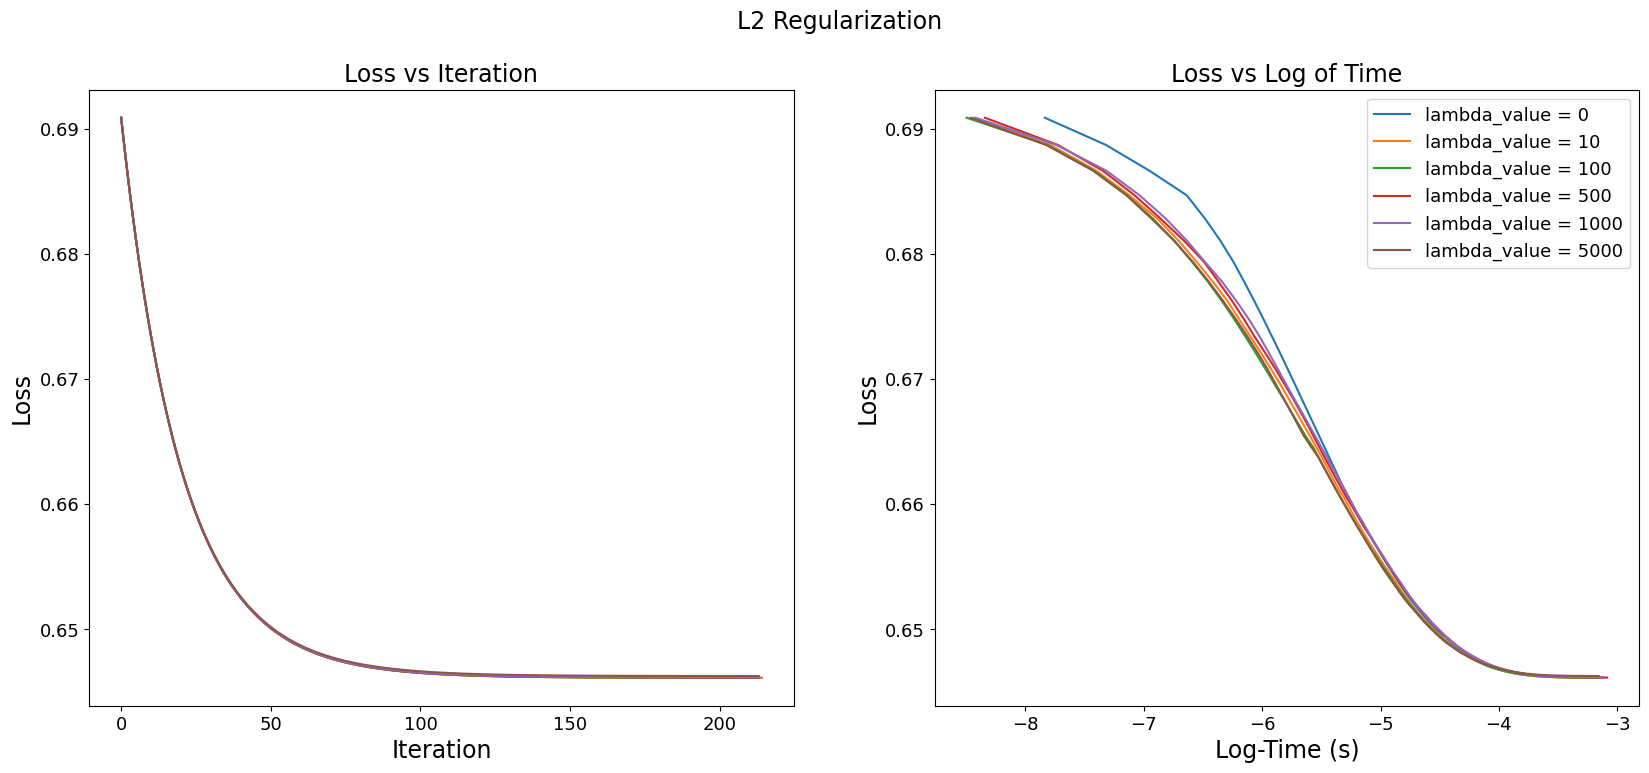

In [58]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("L2 Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[0].plot(loss_loggers[lambda_value], label=f"lambda_value = {lambda_value}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for lambda_value in lambda_values:
    axs[1].plot(np.log(time_loggers[lambda_value]), loss_loggers[lambda_value], label=f"lambda_value = {lambda_value}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/loss_l2_regularization.png"
plt.savefig(file_path, format='png')

plt.show()

In [59]:
import matplotlib.pyplot as plt
from base import LogisticRegressionGD

lambda_value = 100
learning_rates = [0.1,0.2, 0.3, 0.4, 0.5]
num_iterations = 1000
regularization = "l2"

loss_loggers = {}
time_loggers = {}

for learning_rate in learning_rates:
    lr = LogisticRegressionGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        lambda_=lambda_value,
        log=True
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[learning_rate] = lr.history
    time_loggers[learning_rate] = lr.times

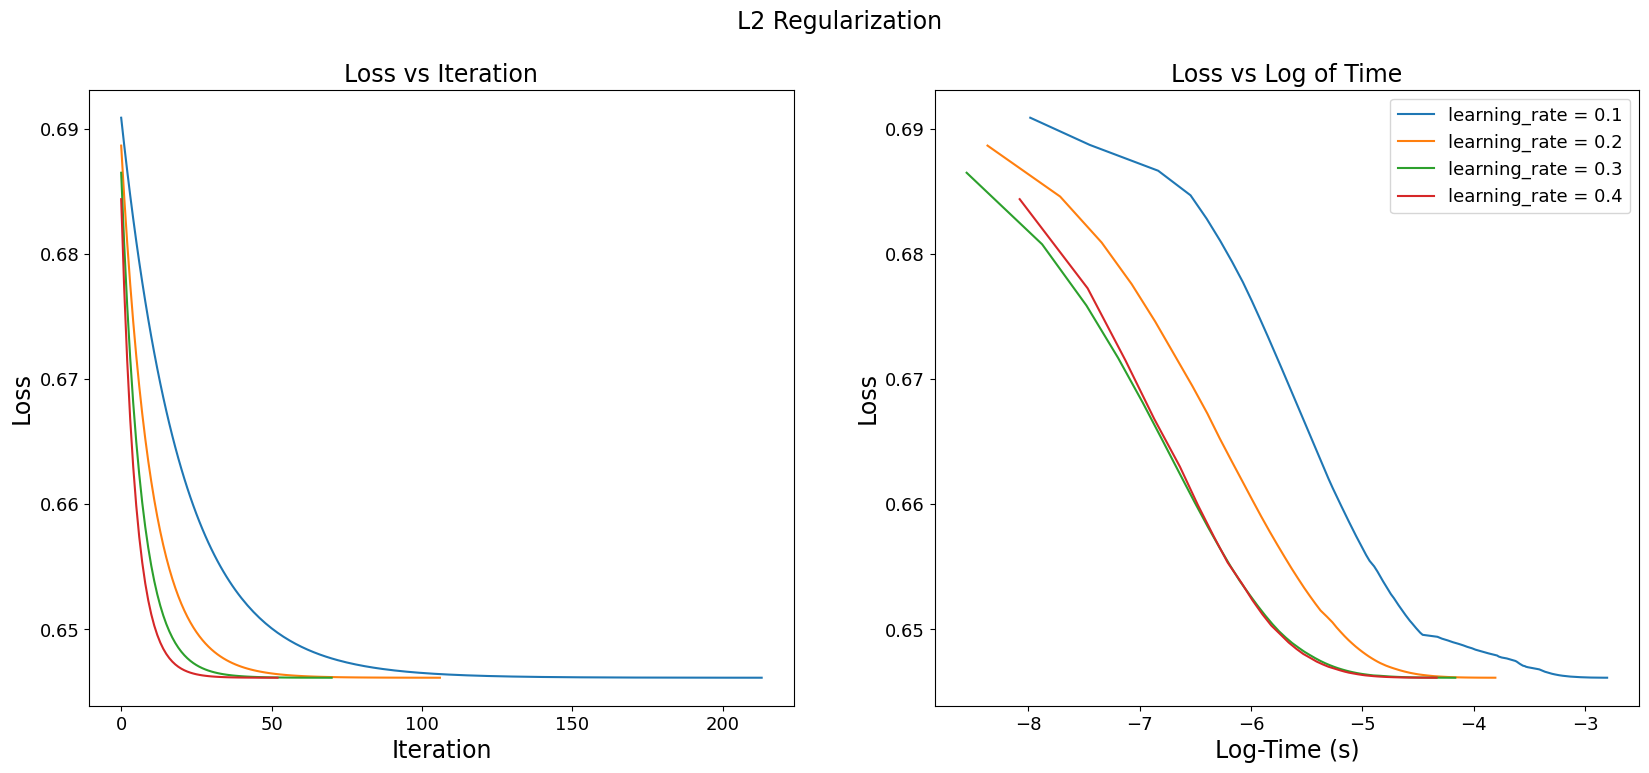

In [60]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("L2 Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for learning_rate in learning_rates[:-1]:
    axs[0].plot(loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for learning_rate in learning_rates[:-1]:
    axs[1].plot(np.log(time_loggers[learning_rate]), loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/loss_l2_regularization_fix_lamda.png"
plt.savefig(file_path, format='png')

plt.show()

# Backtracking

In [61]:
import matplotlib.pyplot as plt
from base import LogisticRegressionGD

learning_rates = [0.01, 0.1, 0.4, 0.9, 1.5]
num_iterations = 500
regularization = "None"
rho = 0.9
c = 0.1

loss_loggers = {}
time_loggers = {}
gradient_loggers = {}
for learning_rate in learning_rates:
    lr = LogisticRegressionGD(
        learning_rate=learning_rate, 
        num_iterations=num_iterations, 
        regularization=regularization,
        log=True,
        backtracking=True,
        rho=rho,
        c=c
    )
    lr.fit(X, y)

    # Save logs
    loss_loggers[learning_rate] = lr.history
    time_loggers[learning_rate] = lr.times

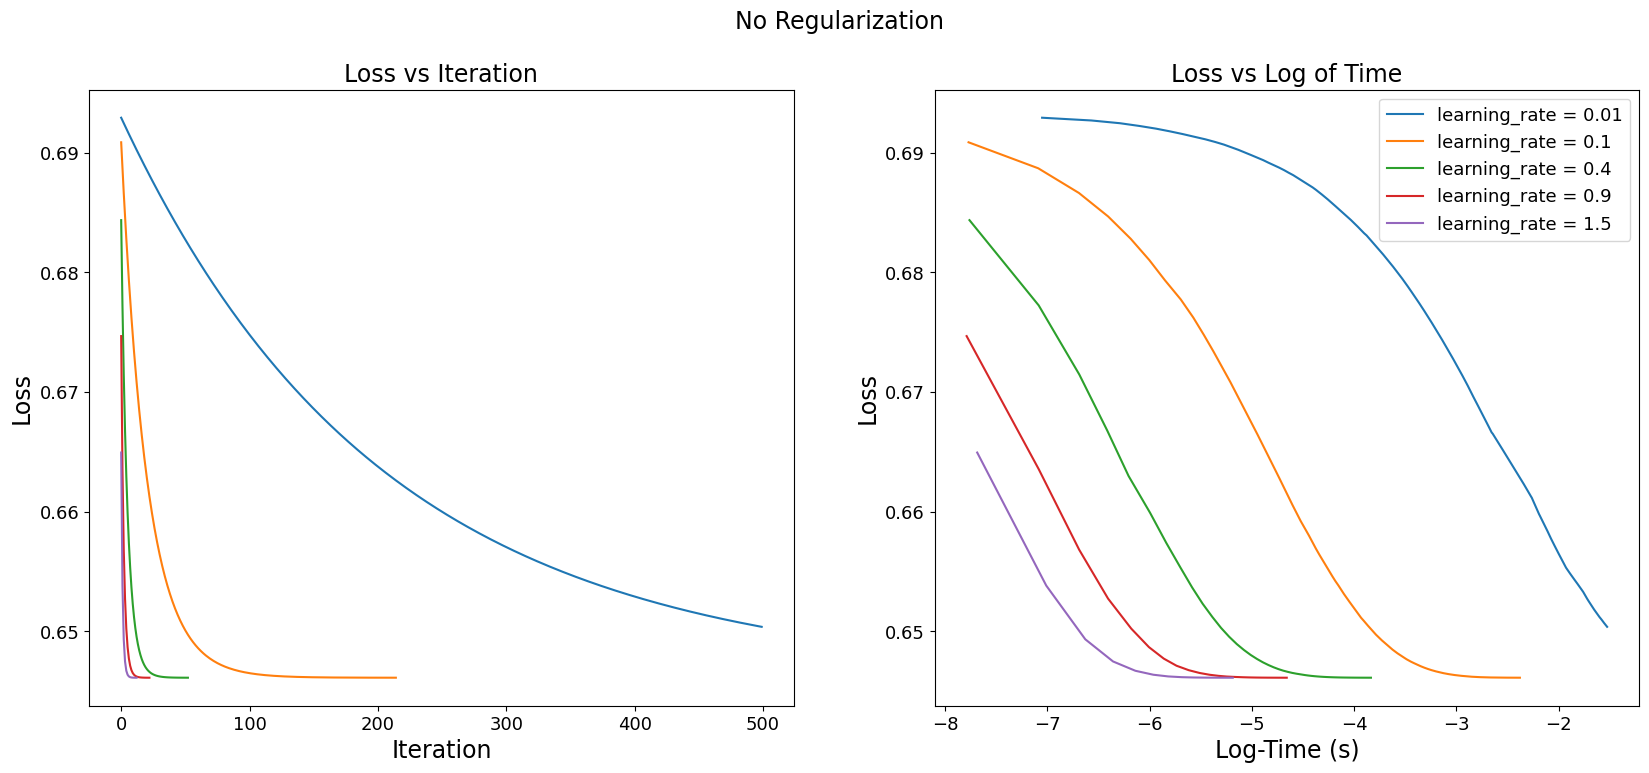

In [62]:
# Plot loss for each learning rate with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Title for the subplots
fig.suptitle("No Regularization", fontsize=fontsize)

# Plot loss vs iteration
axs[0].set_title("Loss vs Iteration", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[0].plot(loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[0].set_xlabel("Iteration", fontsize=fontsize)
axs[0].set_ylabel("Loss", fontsize=fontsize)
axs[0].tick_params(axis='x', labelsize=fontsize - offset)
axs[0].tick_params(axis='y', labelsize=fontsize - offset)
# axs[0].legend()

# Plot loss vs time
axs[1].set_title("Loss vs Log of Time", fontsize=fontsize)
for learning_rate in learning_rates:
    axs[1].plot(np.log(time_loggers[learning_rate]), loss_loggers[learning_rate], label=f"learning_rate = {learning_rate}")

axs[1].set_xlabel("Log-Time (s)", fontsize=fontsize)
axs[1].set_ylabel("Loss", fontsize=fontsize)
axs[1].tick_params(axis='x', labelsize=fontsize - offset)
axs[1].tick_params(axis='y', labelsize=fontsize - offset)
axs[1].legend(fontsize=fontsize - offset)

# Save image
file_path = f"{folder_path}/loss_no_regularization_backtrack.png"
plt.savefig(file_path, format='png')

plt.show()

In [63]:
# EDA - Exploratory Data Analysis
print("=== EDA - Phân tích dữ liệu ===")

# Xử lý cột Date nếu có
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Quarter'] = df['Date'].dt.quarter
    df['Year-Quarter'] = df['Year'].astype(str) + '-Q' + df['Quarter'].astype(str)
    print("Date processing completed!")
    display(df[['Year-Quarter']].head())

# Hàm phân loại nhà sản xuất điện thoại
def extract_manufacturer(mobile_name):
    if isinstance(mobile_name, str):
        if 'Galaxy' in mobile_name:
            return 'Samsung'
        elif 'Redmi' in mobile_name or 'Note' in mobile_name or 'Narzo' in mobile_name:
            return 'Xiaomi'
        elif 'Pixel' in mobile_name:
            return 'Google'
        elif 'iPhone' in mobile_name:
            return 'Apple'
        elif 'Vivo' in mobile_name:
            return 'Vivo'
        elif 'R-70' in mobile_name:
            return 'Realme'
        elif 'iQOO' in mobile_name:
            return 'iQOO'
        elif 'Moto' in mobile_name:
            return 'Motorola'
    return 'Unknown'

# Áp dụng phân loại nhà sản xuất nếu có cột Mobile Name
if 'Mobile Name' in df.columns:
    df['Manufacturer'] = df['Mobile Name'].apply(extract_manufacturer)
    print("\n=== Phân bố Mobile Name ===")
    display(df['Mobile Name'].value_counts())
    
    print("\n=== Phân bố Manufacturer ===")
    display(df['Manufacturer'].value_counts())
else:
    print("Không tìm thấy cột 'Mobile Name' trong dữ liệu")

# Hiển thị thông tin cơ bản về dataset
print(f"\n=== Thông tin Dataset ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

=== EDA - Phân tích dữ liệu ===

=== Phân bố Mobile Name ===


Mobile Name
Moto G85 5G 8/128           560
Galaxy S24 Ultra 12/256     541
Note 11S 6/128              538
Pixel 8 Pro 12/256          533
Narzo N53 4/64              530
Redmi Note 12 Pro 8/128     528
Galaxy M35 5G 8/128         528
Galaxy A55 5G 8/128         522
iQOO Z7 5G 6/128            522
iPhone 16 Pro 256GB         521
Vivo Y200 5G 6/128          520
Pixel 7a 8/128              518
Vivo T3x 5G 8/128           514
R-70 Turbo 5G 6/128         511
iQOO Neo 9 Pro 5G 12/256    502
Note 14 Pro 5G 8/256        495
iPhone 16 Pro Max 1TB       488
Name: count, dtype: int64


=== Phân bố Manufacturer ===


Manufacturer
Xiaomi      2091
Samsung     1591
Google      1051
Vivo        1034
iQOO        1024
Apple       1009
Motorola     560
Realme       511
Name: count, dtype: int64


=== Thông tin Dataset ===
Shape: (8871, 10)
Columns: ['Cus. Location', 'Age', 'Gender', 'Mobile Name', 'Sell Price', 'Does he/she Come from Facebook Page?', 'Does he/she Followed Our Page?', 'Did he/she buy any mobile before?', 'Did he/she hear of our shop before?', 'Manufacturer']

Data types:
Cus. Location                            object
Age                                       int64
Gender                                   object
Mobile Name                              object
Sell Price                              float64
Does he/she Come from Facebook Page?      int64
Does he/she Followed Our Page?           object
Did he/she buy any mobile before?        object
Did he/she hear of our shop before?      object
Manufacturer                             object
dtype: object
